In [1]:
import json
def load_normal_json(filepath:str):
    with open(filepath, 'r') as reader:
        json_obj = json.load(reader)
    return json_obj

In [2]:
jsonFileOne = load_normal_json("./output_tests/delta_times_in_relation_to_time_one_lifts_2000_orders.json")


jsonFileTwo = load_normal_json("./output_tests/delta_times_in_relation_to_time_two_lifts_2000_orders.json")

In [3]:
all_times =[]
all_deltas = []
all_kinds = []


def append_to_big_arrays(json_file, kind: str):
    local_all_times = []
    local_all_deltas = []
    local_all_kinds = []
    for entry in json_file['timing_values']:
        max_time = max(entry['times'])
        percentaged_times = []
        for t in entry['times']:
            percentaged_times.append((t / max_time) * 100)
            local_all_kinds.append(kind)
        local_all_times += percentaged_times
        local_all_deltas += entry['deltas']
    return (local_all_times, local_all_deltas, local_all_kinds)


In [4]:
tupleJsonFileOne = append_to_big_arrays(jsonFileOne, 'oneLift')
tupleJsonFileTwo = append_to_big_arrays(jsonFileTwo, 'twoLift')
all_times += tupleJsonFileOne[0]
all_deltas += tupleJsonFileOne[1]
all_kinds += tupleJsonFileOne[2]

all_times += tupleJsonFileTwo[0]
all_deltas += tupleJsonFileTwo[1]
all_kinds += tupleJsonFileTwo[2]

In [5]:
import pandas as pd
df = pd.DataFrame({
    "time": all_times,
    "delta": all_deltas,
    "kind": all_kinds
})
df

,time,delta,kind
0,0.255641,31.595329,oneLift
1,0.498840,39.503715,oneLift
2,0.629613,21.241929,oneLift
3,0.754715,20.320833,oneLift
4,1.052488,48.368427,oneLift
...,...,...,...
6171117,98.740478,26.050375,twoLift
6171118,99.097328,51.658673,twoLift
6171119,99.440744,49.713963,twoLift
6171120,99.677521,34.276593,twoLift


In [6]:
df['binned_time'] = pd.cut(df['time'], bins=20).apply(lambda interval: f"({interval.left:.2f}, {interval.right:.2f}]")
df

,time,delta,kind,binned_time
0,0.255641,31.595329,oneLift,"(0.07, 5.16]"
1,0.498840,39.503715,oneLift,"(0.07, 5.16]"
2,0.629613,21.241929,oneLift,"(0.07, 5.16]"
3,0.754715,20.320833,oneLift,"(0.07, 5.16]"
4,1.052488,48.368427,oneLift,"(0.07, 5.16]"
...,...,...,...,...
6171117,98.740478,26.050375,twoLift,"(95.01, 100.00]"
6171118,99.097328,51.658673,twoLift,"(95.01, 100.00]"
6171119,99.440744,49.713963,twoLift,"(95.01, 100.00]"
6171120,99.677521,34.276593,twoLift,"(95.01, 100.00]"


In [7]:
df[df['kind'] == 'twoLift'][['delta', 'binned_time']].groupby("binned_time").count()

C:\Users\robbe\AppData\Local\Temp\ipykernel_18996\2346103808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['kind'] == 'twoLift'][['delta', 'binned_time']].groupby("binned_time").count()


,delta
binned_time,
"(0.07, 5.16]",156726
"(5.16, 10.15]",159831
"(10.15, 15.14]",152782
"(15.14, 20.13]",156641
"(20.13, 25.12]",152801
"(25.12, 30.12]",157632
"(30.12, 35.11]",156507
"(35.11, 40.10]",154019
"(40.10, 45.09]",151021


C:\Users\robbe\Documents\GitHub\SoftwareSim\.venv\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


Text(0, 0.5, 'Real time percentage bins')

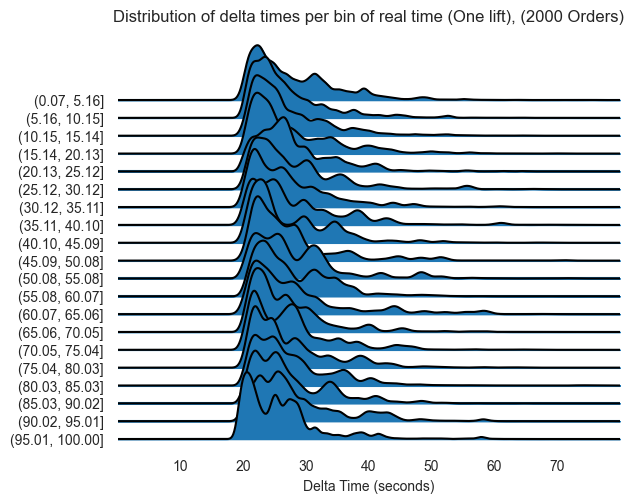

In [10]:
# https://github.com/leotac/joypy/blob/master/Joyplot.ipynb
tempDf = df[df['kind'] == 'oneLift'][['delta', 'binned_time']]
from joypy import joyplot
from matplotlib import pyplot as plt
joyplot(
    data=tempDf,
    by="binned_time",
    column="delta",
    x_range=[0, 80],
)
plt.title(f"Distribution of delta times per bin of real time (One lift), (2000 Orders)")
plt.xlabel("Delta Time (seconds)")
plt.ylabel("Real time percentage bins")

C:\Users\robbe\Documents\GitHub\SoftwareSim\.venv\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


Text(0, 0.5, 'Real time percentage bins')

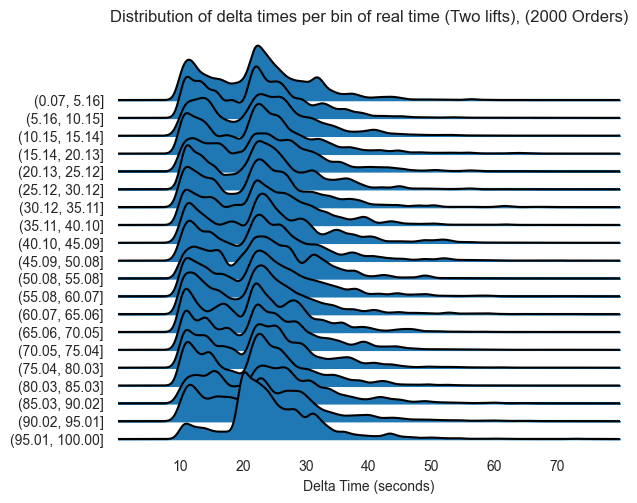

In [22]:
joyplot(
    data=df[df['kind'] == 'twoLift'][['delta', 'binned_time']],
    by="binned_time",
    column="delta",
    x_range=[0, 80]
)
plt.title(f"Distribution of delta times per bin of real time (Two lifts), (2000 Orders)")
plt.xlabel("Delta Time (seconds)")
plt.ylabel("Real time percentage bins")